In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import nltk
!pip install wordcloud
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize.treebank import TreebankWordDetokenizer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import STOPWORDS
import re
from string import punctuation
from bs4 import BeautifulSoup
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import WhitespaceTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer  
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
from wordcloud import STOPWORDS
import string
import pandas as pd
pd.options.mode.chained_assignment = None

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
#read csv of reviews
data_u = pd.read_csv('reviews_Ubereats.csv')
data_p = pd.read_csv('reviews_Postmates.csv')
data_g = pd.read_csv('reviews_Grubhub.csv')
data_d = pd.read_csv('reviews_DoorDash.csv')
data_gv = pd.read_csv('reviews_Grubhub_10000.csv')

In [3]:
data_u

,ReviewID,Content,Score,Time
0,gp:AOqpTOEnO6yUAX8FweTdTODVUaaaCJFARa2PCM0GW_b...,Very good service 👍,5,2022-04-25 15:14:03
1,gp:AOqpTOFcxCcAodmrve3Iy661B3Fv6eR9hlRavR4ujWQ...,Hate this app. Takes forever to get food and w...,1,2022-04-25 15:12:49
2,gp:AOqpTOENo6KHF8rp5dVaSoYh-9qVEu3hMbkQFXAljZ3...,Great food selection and service. Sometimes th...,4,2022-04-25 15:08:35
3,gp:AOqpTOF7YXdwtSlHgSfFLJPCqk6lMgmv5cta1atFLHF...,I am trying to make an order for 2 days now an...,1,2022-04-25 15:08:17
4,gp:AOqpTOHZgQW7mbtp81C6UZ7rVx9sKzEAUkqQNscGeWl...,"After not using your app, don't continuously s...",1,2022-04-25 15:05:34
...,...,...,...,...
9995,gp:AOqpTOEx5kYzq_HH4wIJ4Gw1gpFQmkjMvyKCLJtoubD...,If you have an issue and the driver is not com...,1,2022-03-27 05:31:02
9996,gp:AOqpTOEFE6TlAXRTbnKoseiN0BVR7-ux0w3Jwv8DAxk...,Best app,5,2022-03-27 05:23:11
9997,gp:AOqpTOFxkwB7uG2GCax9fXoMguhISkS4r67zdugJKj9...,Best food delivery app,5,2022-03-27 05:23:07
9998,gp:AOqpTOHqzdq59j07mBP-ScCo0q5SM4XBtT4MqKpmtGX...,Awful drivers cancel at drop of a hat. Going b...,1,2022-03-27 05:18:31


In [4]:
data_u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ReviewID  10000 non-null  object
 1   Content   9998 non-null   object
 2   Score     10000 non-null  int64 
 3   Time      10000 non-null  object
dtypes: int64(1), object(3)
memory usage: 312.6+ KB


In [5]:
data_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ReviewID  10000 non-null  object
 1   Content   10000 non-null  object
 2   Score     10000 non-null  int64 
 3   Time      10000 non-null  object
dtypes: int64(1), object(3)
memory usage: 312.6+ KB


In [6]:
data_g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ReviewID  16000 non-null  object
 1   Content   15999 non-null  object
 2   Score     16000 non-null  int64 
 3   Time      16000 non-null  object
dtypes: int64(1), object(3)
memory usage: 500.1+ KB


In [8]:
data_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ReviewID  10000 non-null  object
 1   Content   10000 non-null  object
 2   Score     10000 non-null  int64 
 3   Time      10000 non-null  object
dtypes: int64(1), object(3)
memory usage: 312.6+ KB


In [7]:
data_gv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ReviewID  10000 non-null  object 
 1   Content   9999 non-null   object 
 2   Score     10000 non-null  float64
 3   Time      10000 non-null  object 
dtypes: float64(1), object(3)
memory usage: 500.1+ KB


In [9]:
print(data_u.isnull().sum())
print(data_p.isnull().sum())
print(data_g.isnull().sum())
print(data_d.isnull().sum())
print(data_gv.isnull().sum())

ReviewID    0
Content     2
Score       0
Time        0
dtype: int64
ReviewID    0
Content     0
Score       0
Time        0
dtype: int64
ReviewID    0
Content     1
Score       0
Time        0
dtype: int64
ReviewID    0
Content     0
Score       0
Time        0
dtype: int64
ReviewID    6000
Content     6001
Score       6000
Time        6000
dtype: int64


In [10]:
data_u = data_u.dropna()
data_gv = data_gv.dropna()

In [11]:
#data_u.loc[:,'Content'] = data_u.loc[:, 'Content'].astype(str)
data_u['Content'] = data_u['Content'].astype(str)
data_p['Content'] = data_p['Content'].astype(str)
data_g['Content'] = data_g['Content'].astype(str)
data_d['Content'] = data_d['Content'].astype(str)
data_gv['Content'] = data_g['Content'].astype(str)

In [12]:
# 1. lower the words
data_u['Content1']= data_u['Content'].str.lower()
data_p['Content1']= data_p['Content'].str.lower()
data_g['Content1']= data_g['Content'].str.lower()
data_d['Content1']= data_d['Content'].str.lower()
data_gv['Content1']= data_g['Content'].str.lower()

In [13]:
contrac_dict = {"aren't": "are not", "can't": "cannot", "can't've": "cannot have", "could've": "could have", "couldn't": "could not","didn't": "did not","doesn't": "does not","don't": "do not","hadn't": "had not","hasn't": "has not","haven't": "have not","he'd": "he had","he'd've": "he would have","he'll": "he will","he'll've": "he shall have / he will have", "he's": "he is","how'd": "how did","how'll": "how will","how's": "how is","I'd": "I would","I'll": " I will","I'm": "I am","I've": "I have","isn't": "is not","it'd": " it would","it'd've": "it would have","it'll": "it will","it's": "it is","let's": "let us","mayn't": "may not","might've": "might have","mightn't": "might not","must've": "must have","mustn't": "must not","needn't": "need not","o'clock": "of the clock","oughtn't": "ought not","shan't": "shall not","she'd": "she would","she'll": " she will","she's": "she has / she is","should've": "should have","shouldn't": "should not","so've": "so have","so's": "so as / so is","that'd": "that would","that's": "that is","there'd": "there would","there's": "there is","they'd": "they would","they'll": "they will","they're": "they are","they've": "they have","to've": "to have","wasn't": "was not","we'd": "we had","we'll": "we will","we're": "we are","we've": "we have","weren't": "were not","what'll": " what will","what're": "what are","what's": "what is","what've": "what have","when's": "when is","when've": "when have","where'd": "where did","where's": "where is","where've": "where have",
"who'll": "who will","who's": "who is","who've": "who have","why's": "why is","why've": "why have","will've": "will have","won't": "will not","would've": "would have","wouldn't": "would not","y'all": "you all","you'd": "you would","you'll": "you will","you're": "you are","you've": "you have"}

# 2. Expanding Contractions for reviews
contrac_re=re.compile('(%s)' % '|'.join(contrac_dict.keys()))
def expand_cont(text,contrac_dict=contrac_dict):
    def replace(text):
        return contrac_dict[text.group(0)]
    return contrac_re.sub(replace, text)

data_u['Content1']=data_u['Content1'].apply(lambda x:expand_cont(x))
data_p['Content1']=data_p['Content1'].apply(lambda x:expand_cont(x))
data_g['Content1']=data_g['Content1'].apply(lambda x:expand_cont(x))
data_d['Content1']=data_d['Content1'].apply(lambda x:expand_cont(x))
data_gv['Content1']=data_g['Content1'].apply(lambda x:expand_cont(x))

In [14]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [15]:
# 3. remove punctuation, stopwords, HTML, URL and perform lemmatization and regex
stop_words = set(stopwords.words("english"))
stop_words2 = set(STOPWORDS)
def clean(text):
    # remove punctuation
    text="".join([i for i in text if i not in string.punctuation])
    # remove stopwords
    text=" ".join([word for word in str(text).split() if word not in stop_words])
    text=" ".join([word for word in str(text).split() if word not in stop_words2])
    # lemmatization
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])
    # remove HTML tag
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(text) 
    text1 = soup.get_text()
    # remove URL
    text2 = re.sub(r"http?://\S+", "", text1) 
    # regex
    text = re.sub(r"[^a-zA-Z]", " ", text)
    # remove extra space
    text = re.sub(r" +", ' ', text)
    return text

data_u['Content1']= data_u['Content1'].apply(lambda x:clean(x))
data_p['Content1']= data_p['Content1'].apply(lambda x:clean(x))
data_g['Content1']= data_g['Content1'].apply(lambda x:clean(x))
data_d['Content1']= data_d['Content1'].apply(lambda x:clean(x))
data_gv['Content1']= data_g['Content1'].apply(lambda x:clean(x))

In [ ]:
#data_u

In [ ]:
#data_u["Content"][2]

In [ ]:
#data_u["Content1"][2]

In [16]:
data_u["Platform"] = "Ubereats"
data_p["Platform"] = "Postmates"
data_g["Platform"] = "Grubhub"
data_d["Platform"] = "DoorDash"
data_gv["Platform"] = "Grubhub"

frames = [data_u, data_p, data_g, data_d]
frames_v = [data_u, data_p, data_gv, data_d]
total = pd.concat(frames)
total_v = pd.concat(frames_v)

score_dist = total_v.groupby(["Platform","Score"]).size().reset_index(name='counts')
score_dist

,Platform,Score,counts
0,DoorDash,1.0,3545
1,DoorDash,2.0,749
2,DoorDash,3.0,842
3,DoorDash,4.0,918
4,DoorDash,5.0,3946
5,Grubhub,1.0,3844
6,Grubhub,2.0,830
7,Grubhub,3.0,793
8,Grubhub,4.0,927
9,Grubhub,5.0,3605


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

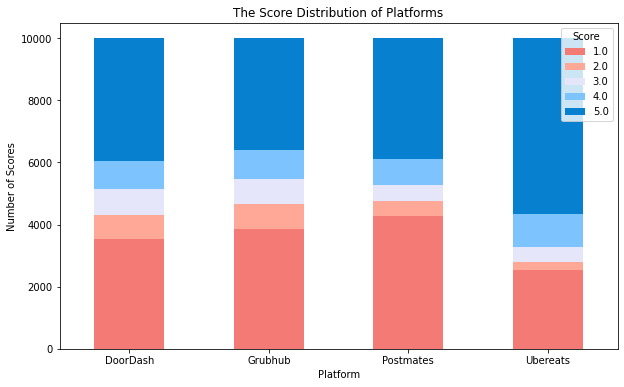

In [17]:
#fig = plt.figure(figsize =(10, 7))
#plt.title('The Score Distribution of Platforms')
#pie_colors = ['#C6E2FF','#FFEC8B','#FAF0E6','#FFB6C1','#FFC0CB']
pie_colors = ['#f47a75','#ffa897','#E6E6FA','#7dc3fe','#0780cf']
score_dist.pivot(*score_dist).plot(kind = 'bar', stacked = True, title='The Score Distribution of Platforms', figsize=(10,6), color = pie_colors)
plt.ylabel('Number of Scores')
legend = plt.legend(loc='upper right')
legend.set_title("Score")
plt.xticks(rotation=360)
#rotation=45, fontweight='bold', fontsize='17', horizontalalignment='right'

In [18]:
score_pivot_df = score_dist.pivot(*score_dist)

In [19]:
score_pivot_df

Score,1.0,2.0,3.0,4.0,5.0
Platform,,,,,
DoorDash,3545,749,842,918,3946
Grubhub,3844,830,793,927,3605
Postmates,4281,493,490,854,3882
Ubereats,2523,272,470,1081,5652


In [20]:
D_score = score_pivot_df.iloc[0]
G_score = score_pivot_df.iloc[1]
P_score = score_pivot_df.iloc[2]
U_score = score_pivot_df.iloc[3]

Text(0.5, 0.98, 'The Score Distribution of Platforms')

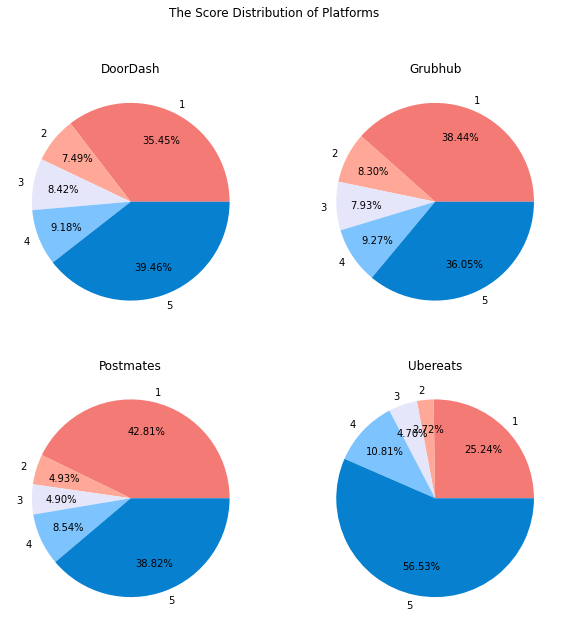

In [21]:
fig,axes=plt.subplots(2,2, figsize=(10,10))
labels = ['1','2','3','4','5']
colors = ['#f47a75','#ffa897','#E6E6FA','#7dc3fe','#0780cf']
axes[0,0].pie(D_score,
          colors = colors,
          labels = labels,
          autopct='%.2f%%',
          pctdistance=0.7,
          labeldistance=1.1
        )
axes[0,0].set_title('DoorDash')

axes[0,1].pie(G_score,
          colors = colors,
          labels = labels,
          autopct='%.2f%%',
          pctdistance=0.7,
          labeldistance=1.1
        )
axes[0,1].set_title('Grubhub')

axes[1,0].pie(P_score,
          colors = colors,
          labels = labels,
          autopct='%.2f%%',
          pctdistance=0.7,
          labeldistance=1.1
        )
axes[1,0].set_title('Postmates')

axes[1,1].pie(U_score,
          colors = colors,
          labels = labels,
          autopct='%.2f%%',
          pctdistance=0.7,
          labeldistance=1.1
        )
axes[1,1].set_title('Ubereats')

fig.suptitle("The Score Distribution of Platforms")


In [22]:
total_v

,ReviewID,Content,Score,Time,Content1,Platform
0,gp:AOqpTOEnO6yUAX8FweTdTODVUaaaCJFARa2PCM0GW_b...,Very good service 👍,5.0,2022-04-25 15:14:03,good service,Ubereats
1,gp:AOqpTOFcxCcAodmrve3Iy661B3Fv6eR9hlRavR4ujWQ...,Hate this app. Takes forever to get food and w...,1.0,2022-04-25 15:12:49,hate app take forever food way expensive,Ubereats
2,gp:AOqpTOENo6KHF8rp5dVaSoYh-9qVEu3hMbkQFXAljZ3...,Great food selection and service. Sometimes th...,4.0,2022-04-25 15:08:35,great food selection service sometimes restaur...,Ubereats
3,gp:AOqpTOF7YXdwtSlHgSfFLJPCqk6lMgmv5cta1atFLHF...,I am trying to make an order for 2 days now an...,1.0,2022-04-25 15:08:17,trying make order day app let last assigned ki...,Ubereats
4,gp:AOqpTOHZgQW7mbtp81C6UZ7rVx9sKzEAUkqQNscGeWl...,"After not using your app, don't continuously s...",1.0,2022-04-25 15:05:34,using app continuously spam multiple different...,Ubereats
...,...,...,...,...,...,...
9995,gp:AOqpTOGKeGiX3Nheg3yjkcWWIjp36SLUgXyZpSJlx2v...,"I am an idiot, but food.",5.0,2022-03-27 18:43:58,idiot food,DoorDash
9996,gp:AOqpTOEnT3yz7kHJRH8yeKrLikwCTPsSN5dGhwAZ_Q7...,so cool,5.0,2022-03-27 18:35:46,cool,DoorDash
9997,gp:AOqpTOEGPEZ3PaZrtSGiSihwNUkvZYzg3j2oIciOUnp...,my favorite,5.0,2022-03-27 18:34:22,favorite,DoorDash
9998,gp:AOqpTOEZiS08sV2O6bg--iqCpOn63QBnu2zWTaBBHJu...,50% o on first 2 orders.. great👍,5.0,2022-03-27 18:28:55,first order great,DoorDash


In [23]:
total_v['Score'] = total_v['Score'].astype(int)
conditions = [(total_v["Score"] < 3),(total_v["Score"] > 3),(total_v["Score"] == 3)]
values = ['negative', 'positive','neutral']
total_v["Sentiment"] = np.select(conditions, values)
total_v

,ReviewID,Content,Score,Time,Content1,Platform,Sentiment
0,gp:AOqpTOEnO6yUAX8FweTdTODVUaaaCJFARa2PCM0GW_b...,Very good service 👍,5,2022-04-25 15:14:03,good service,Ubereats,positive
1,gp:AOqpTOFcxCcAodmrve3Iy661B3Fv6eR9hlRavR4ujWQ...,Hate this app. Takes forever to get food and w...,1,2022-04-25 15:12:49,hate app take forever food way expensive,Ubereats,negative
2,gp:AOqpTOENo6KHF8rp5dVaSoYh-9qVEu3hMbkQFXAljZ3...,Great food selection and service. Sometimes th...,4,2022-04-25 15:08:35,great food selection service sometimes restaur...,Ubereats,positive
3,gp:AOqpTOF7YXdwtSlHgSfFLJPCqk6lMgmv5cta1atFLHF...,I am trying to make an order for 2 days now an...,1,2022-04-25 15:08:17,trying make order day app let last assigned ki...,Ubereats,negative
4,gp:AOqpTOHZgQW7mbtp81C6UZ7rVx9sKzEAUkqQNscGeWl...,"After not using your app, don't continuously s...",1,2022-04-25 15:05:34,using app continuously spam multiple different...,Ubereats,negative
...,...,...,...,...,...,...,...
9995,gp:AOqpTOGKeGiX3Nheg3yjkcWWIjp36SLUgXyZpSJlx2v...,"I am an idiot, but food.",5,2022-03-27 18:43:58,idiot food,DoorDash,positive
9996,gp:AOqpTOEnT3yz7kHJRH8yeKrLikwCTPsSN5dGhwAZ_Q7...,so cool,5,2022-03-27 18:35:46,cool,DoorDash,positive
9997,gp:AOqpTOEGPEZ3PaZrtSGiSihwNUkvZYzg3j2oIciOUnp...,my favorite,5,2022-03-27 18:34:22,favorite,DoorDash,positive
9998,gp:AOqpTOEZiS08sV2O6bg--iqCpOn63QBnu2zWTaBBHJu...,50% o on first 2 orders.. great👍,5,2022-03-27 18:28:55,first order great,DoorDash,positive


In [24]:
total['Score'] = total['Score'].astype(int)
conditions = [(total["Score"] < 3),(total["Score"] > 3),(total["Score"] == 3)]
values = ['negative', 'positive','neutral']
total["Sentiment"] = np.select(conditions, values)
total

,ReviewID,Content,Score,Time,Content1,Platform,Sentiment
0,gp:AOqpTOEnO6yUAX8FweTdTODVUaaaCJFARa2PCM0GW_b...,Very good service 👍,5,2022-04-25 15:14:03,good service,Ubereats,positive
1,gp:AOqpTOFcxCcAodmrve3Iy661B3Fv6eR9hlRavR4ujWQ...,Hate this app. Takes forever to get food and w...,1,2022-04-25 15:12:49,hate app take forever food way expensive,Ubereats,negative
2,gp:AOqpTOENo6KHF8rp5dVaSoYh-9qVEu3hMbkQFXAljZ3...,Great food selection and service. Sometimes th...,4,2022-04-25 15:08:35,great food selection service sometimes restaur...,Ubereats,positive
3,gp:AOqpTOF7YXdwtSlHgSfFLJPCqk6lMgmv5cta1atFLHF...,I am trying to make an order for 2 days now an...,1,2022-04-25 15:08:17,trying make order day app let last assigned ki...,Ubereats,negative
4,gp:AOqpTOHZgQW7mbtp81C6UZ7rVx9sKzEAUkqQNscGeWl...,"After not using your app, don't continuously s...",1,2022-04-25 15:05:34,using app continuously spam multiple different...,Ubereats,negative
...,...,...,...,...,...,...,...
9995,gp:AOqpTOGKeGiX3Nheg3yjkcWWIjp36SLUgXyZpSJlx2v...,"I am an idiot, but food.",5,2022-03-27 18:43:58,idiot food,DoorDash,positive
9996,gp:AOqpTOEnT3yz7kHJRH8yeKrLikwCTPsSN5dGhwAZ_Q7...,so cool,5,2022-03-27 18:35:46,cool,DoorDash,positive
9997,gp:AOqpTOEGPEZ3PaZrtSGiSihwNUkvZYzg3j2oIciOUnp...,my favorite,5,2022-03-27 18:34:22,favorite,DoorDash,positive
9998,gp:AOqpTOEZiS08sV2O6bg--iqCpOn63QBnu2zWTaBBHJu...,50% o on first 2 orders.. great👍,5,2022-03-27 18:28:55,first order great,DoorDash,positive


In [31]:
senti_dist_v = total_v.groupby(["Platform","Sentiment"]).size().reset_index(name='counts')
senti_dist_v

,Platform,Sentiment,counts
0,DoorDash,negative,4294
1,DoorDash,neutral,842
2,DoorDash,positive,4864
3,Grubhub,negative,4674
4,Grubhub,neutral,793
5,Grubhub,positive,4532
6,Postmates,negative,4774
7,Postmates,neutral,490
8,Postmates,positive,4736
9,Ubereats,negative,2795


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

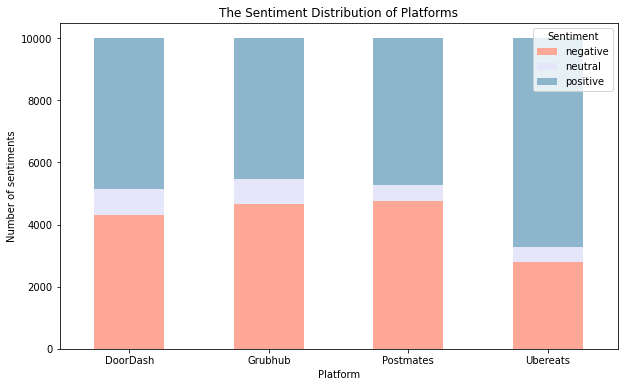

In [33]:
pie_colors = ['#ffa897','#E6E6FA','#8db6cd']
senti_dist_v.pivot(*senti_dist_v).plot(kind = 'bar', stacked = True, title='The Sentiment Distribution of Platforms', figsize=(10,6),color = pie_colors)
plt.ylabel('Number of sentiments')
legend = plt.legend(loc='upper right')
legend.set_title("Sentiment")
plt.xticks(rotation=360)

In [35]:
senti_pivot_df=senti_dist_v.pivot(*senti_dist_v)

In [36]:
senti_pivot_df

Sentiment,negative,neutral,positive
Platform,,,
DoorDash,4294,842,4864
Grubhub,4674,793,4532
Postmates,4774,490,4736
Ubereats,2795,470,6733


In [37]:
D_senti = senti_pivot_df.iloc[0]
G_senti = senti_pivot_df.iloc[1]
P_senti = senti_pivot_df.iloc[2]
U_senti = senti_pivot_df.iloc[3]

Text(0.5, 0.98, 'The Sentiment Distribution of Platforms')

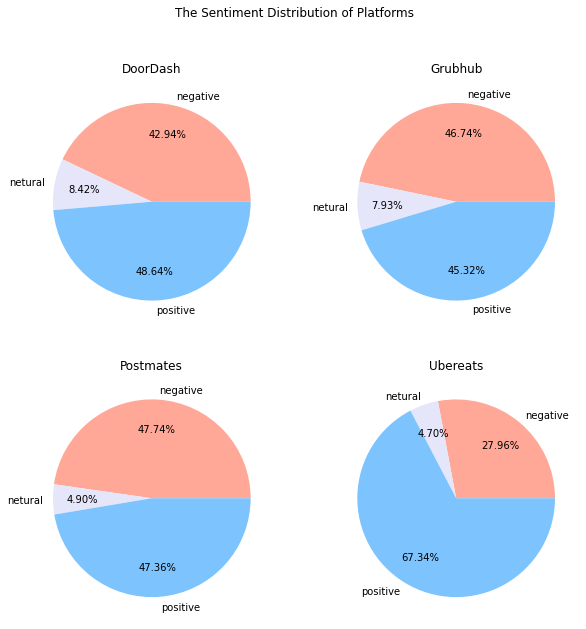

In [38]:
fig,axes=plt.subplots(2,2, figsize=(10,10))
labels = ['negative','netural','positive']
colors = ['#ffa897','#E6E6FA','#7dc3fe']
axes[0,0].pie(D_senti,
          colors = colors,
          labels = labels,
          autopct='%.2f%%',
          pctdistance=0.7,
          labeldistance=1.1
        )
axes[0,0].set_title('DoorDash')

axes[0,1].pie(G_senti,
          colors = colors,
          labels = labels,
          autopct='%.2f%%',
          pctdistance=0.7,
          labeldistance=1.1
        )
axes[0,1].set_title('Grubhub')

axes[1,0].pie(P_senti,
          colors = colors,
          labels = labels,
          autopct='%.2f%%',
          pctdistance=0.7,
          labeldistance=1.1
        )
axes[1,0].set_title('Postmates')

axes[1,1].pie(U_senti,
          colors = colors,
          labels = labels,
          autopct='%.2f%%',
          pctdistance=0.7,
          labeldistance=1.1
        )
axes[1,1].set_title('Ubereats')

fig.suptitle("The Sentiment Distribution of Platforms")


In [42]:
total_v.rename(columns = {'Content1':'Clean_Content'}, inplace = True)
total.rename(columns = {'Content1':'Clean_Content'}, inplace = True)

In [40]:
positive_v = " ".join(Clean_Content for Clean_Content in total_v[total_v.Sentiment == "positive"].Clean_Content)
negative_v = " ".join(Clean_Content for Clean_Content in total_v[total_v.Sentiment == "negative"].Clean_Content)

In [43]:
positive = " ".join(Clean_Content for Clean_Content in total[total.Sentiment == "positive"].Clean_Content)
negative = " ".join(Clean_Content for Clean_Content in total[total.Sentiment == "negative"].Clean_Content)

In [45]:
from PIL import Image
google_play = np.array(Image.open('Food2.png')) 
google_play

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

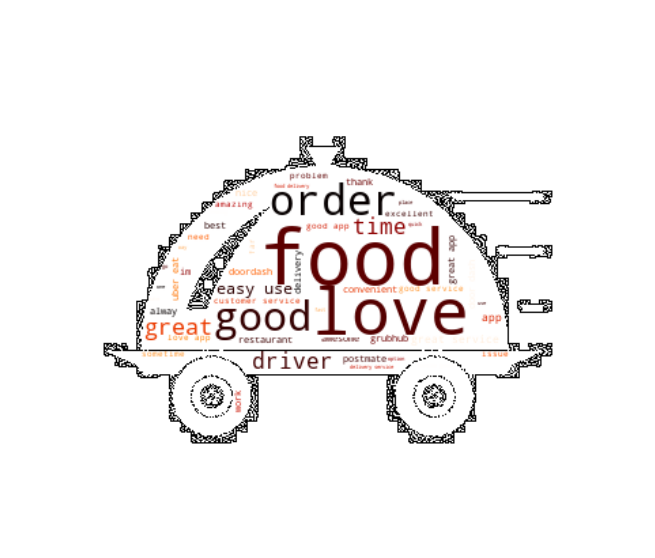

In [46]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Create a word cloud image
wc = WordCloud(background_color="white", colormap="gist_heat", max_words=50, mask=google_play, contour_width=0.0001, contour_color='black')

# Generate a wordcloud
wc.generate(positive)
     
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


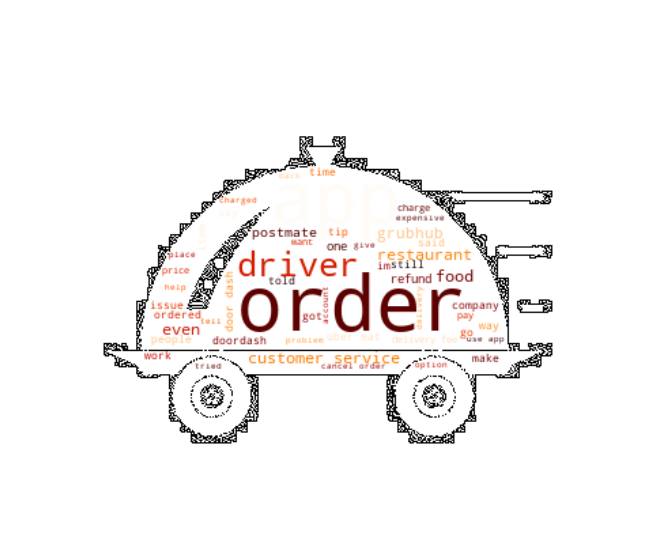

In [47]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Create a word cloud image
wc = WordCloud(background_color="white", colormap="gist_heat", max_words=50, mask=google_play, contour_width=0.0001, contour_color='black')

# Generate a wordcloud
wc.generate(negative)
     
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


In [48]:
total

,ReviewID,Content,Score,Time,Clean_Content,Platform,Sentiment
0,gp:AOqpTOEnO6yUAX8FweTdTODVUaaaCJFARa2PCM0GW_b...,Very good service 👍,5,2022-04-25 15:14:03,good service,Ubereats,positive
1,gp:AOqpTOFcxCcAodmrve3Iy661B3Fv6eR9hlRavR4ujWQ...,Hate this app. Takes forever to get food and w...,1,2022-04-25 15:12:49,hate app take forever food way expensive,Ubereats,negative
2,gp:AOqpTOENo6KHF8rp5dVaSoYh-9qVEu3hMbkQFXAljZ3...,Great food selection and service. Sometimes th...,4,2022-04-25 15:08:35,great food selection service sometimes restaur...,Ubereats,positive
3,gp:AOqpTOF7YXdwtSlHgSfFLJPCqk6lMgmv5cta1atFLHF...,I am trying to make an order for 2 days now an...,1,2022-04-25 15:08:17,trying make order day app let last assigned ki...,Ubereats,negative
4,gp:AOqpTOHZgQW7mbtp81C6UZ7rVx9sKzEAUkqQNscGeWl...,"After not using your app, don't continuously s...",1,2022-04-25 15:05:34,using app continuously spam multiple different...,Ubereats,negative
...,...,...,...,...,...,...,...
9995,gp:AOqpTOGKeGiX3Nheg3yjkcWWIjp36SLUgXyZpSJlx2v...,"I am an idiot, but food.",5,2022-03-27 18:43:58,idiot food,DoorDash,positive
9996,gp:AOqpTOEnT3yz7kHJRH8yeKrLikwCTPsSN5dGhwAZ_Q7...,so cool,5,2022-03-27 18:35:46,cool,DoorDash,positive
9997,gp:AOqpTOEGPEZ3PaZrtSGiSihwNUkvZYzg3j2oIciOUnp...,my favorite,5,2022-03-27 18:34:22,favorite,DoorDash,positive
9998,gp:AOqpTOEZiS08sV2O6bg--iqCpOn63QBnu2zWTaBBHJu...,50% o on first 2 orders.. great👍,5,2022-03-27 18:28:55,first order great,DoorDash,positive


# Sentiment Analysis

#### function preparations

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import datasets
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, precision_recall_curve, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import confusion_matrix, precision_score, precision_recall_curve, recall_score, f1_score, accuracy_score

In [50]:
class Dataset:
  def __init__(self,train_dict,start_idx, end_idx):
    self.data = total['Clean_Content'][start_idx:end_idx]
    self.labels = total['Sentiment'][start_idx:end_idx]
    self.vecs = None
    
def split_dataset(dataset, train_rate=0.7):
  data_size = len(dataset['Clean_Content'])
  train_last_idx = int(train_rate * data_size)
  train = Dataset(dataset, 0, train_last_idx)
  test = Dataset(dataset, train_last_idx, data_size)
  return train, test

train, test = split_dataset(total)
print('train data size:', len(train.data))
print('test data size:', len(test.data))

train data size: 32198
test data size: 13800


In [51]:
# CountVectorizer
unigram = CountVectorizer(ngram_range=(1,1))
bigram = CountVectorizer(ngram_range=(2,2))
trigram = CountVectorizer(ngram_range=(3,3))
combined = CountVectorizer(ngram_range=(1,3))

vectorizers = [unigram, bigram, trigram, combined]
[vectorizer.fit(train.data) for vectorizer in vectorizers]

# TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf_bigram = TfidfVectorizer(ngram_range=(2,2))
tfidf_trigram = TfidfVectorizer(ngram_range=(3,3))
tfidf_combined = TfidfVectorizer(ngram_range=(1,3))

tfidf_vectorizers = [tfidf, tfidf_bigram, tfidf_trigram, tfidf_combined]
[tfidf_vectorizer.fit(train.data) for tfidf_vectorizer in tfidf_vectorizers]

[TfidfVectorizer(),
 TfidfVectorizer(ngram_range=(2, 2)),
 TfidfVectorizer(ngram_range=(3, 3)),
 TfidfVectorizer(ngram_range=(1, 3))]

In [52]:
def classification_model(vectorizer, model, fit_vect=False):
  if fit_vect:
    vectorizer.fit(train.data)
  train.vecs = vectorizer.transform(train.data)
  test.vecs = vectorizer.transform(test.data)
  model.fit(train.vecs, train.labels)
  train_preds = model.predict(train.vecs)
  train_f1 = f1_score(train.labels, train_preds, average='micro')
  test_preds = model.predict(test.vecs)
  test_f1 = f1_score(test.labels, test_preds, average='micro')
  return train_f1, test_f1  

#### MNB

unigram => (0.8942791477731536, 0.811231884057971)
bigram => (0.967575625815268, 0.7968115942028986)
trigram => (0.9644698428473818, 0.6927536231884058)
combined => (0.9761165289769551, 0.823695652173913)


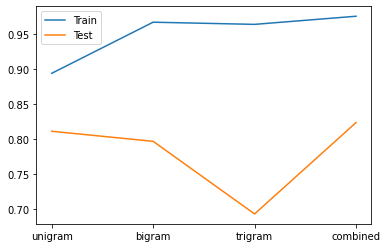

In [53]:
# choose the best tfidf n-gram
tfidf_vectorizer_names = ['unigram', 'bigram', 'trigram', 'combined']
x_var = list(range(len(tfidf_vectorizer_names)))
outcomes = []
for i in range(len(tfidf_vectorizers)):
  model = MultinomialNB(alpha=0.1)
  res = classification_model(tfidf_vectorizers[i], model)
  outcomes.append(res)
  print(tfidf_vectorizer_names[i], '=>', res)
  
plt.plot(x_var, outcomes)
plt.xticks(x_var, tfidf_vectorizer_names)
plt.legend(["Train", "Test"])
plt.show()

unigram => (0.8940306851357227, 0.8007971014492754)
bigram => (0.9679172619417356, 0.7866666666666666)
trigram => (0.9639418597428412, 0.6900724637681159)
combined => (0.9781974035654388, 0.8152173913043479)


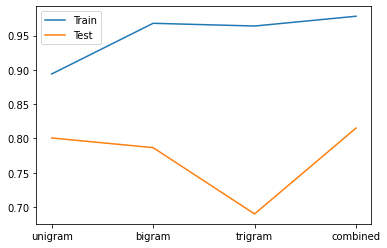

In [54]:
# choose the best countvectorizer n-gram
vectorizer_names = ['unigram', 'bigram', 'trigram', 'combined']
x_var = list(range(len(vectorizer_names)))
outcomes = []
for i in range(len(vectorizers)):
  model = MultinomialNB(alpha=0.1)
  res = classification_model(vectorizers[i], model)
  outcomes.append(res)
  print(vectorizer_names[i], '=>', res)
  
plt.plot(x_var, outcomes)
plt.xticks(x_var, vectorizer_names)
plt.legend(["Train", "Test"])
plt.show()

In [56]:
# MNB - Tfidf
alpha_range = np.arange(0.1,1,0.1)
min_df_range = np.arange(1,20,5)
max_df_range = np.arange(0.5,1,0.1)
max_test_accuracy=0
for i in alpha_range:
    for j in min_df_range:
        for n in max_df_range:
            model = MultinomialNB(alpha=i)
            tfidf_comb = TfidfVectorizer(ngram_range=(1,3),min_df = j, max_df = n)
            tfidf_comb.fit(train.data)
            res = classification_model(tfidf_comb, model)
            #outcomes.append(res)
            print("Alpha",i,",","min_df",j,",","max_df",n, '=>', res)
            if(res[1] > max_test_accuracy):
                opt_alpha = i
                opt_min_df = j
                opt_max_df = n
                max_test_accuracy = res[1]
print("Choice:", "Alpha", opt_alpha,",", "Min_df",opt_min_df,",", "Max_df", opt_max_df, "accuracy", max_test_accuracy)



Alpha 0.1 , min_df 1 , max_df 0.5 => (0.9761165289769551, 0.823695652173913)
Alpha 0.1 , min_df 1 , max_df 0.6 => (0.9761165289769551, 0.823695652173913)
Alpha 0.1 , min_df 1 , max_df 0.7 => (0.9761165289769551, 0.823695652173913)
Alpha 0.1 , min_df 1 , max_df 0.7999999999999999 => (0.9761165289769551, 0.823695652173913)
Alpha 0.1 , min_df 1 , max_df 0.8999999999999999 => (0.9761165289769551, 0.823695652173913)
Alpha 0.1 , min_df 6 , max_df 0.5 => (0.8949313621964097, 0.8198550724637681)
Alpha 0.1 , min_df 6 , max_df 0.6 => (0.8949313621964097, 0.8198550724637681)
Alpha 0.1 , min_df 6 , max_df 0.7 => (0.8949313621964097, 0.8198550724637681)
Alpha 0.1 , min_df 6 , max_df 0.7999999999999999 => (0.8949313621964097, 0.8198550724637681)
Alpha 0.1 , min_df 6 , max_df 0.8999999999999999 => (0.8949313621964097, 0.8198550724637681)
Alpha 0.1 , min_df 11 , max_df 0.5 => (0.8813280327970682, 0.8181159420289855)
Alpha 0.1 , min_df 11 , max_df 0.6 => (0.8813280327970682, 0.8181159420289855)
Alpha 0

In [ ]:
#Alpha 0.30000000000000004 , min_df 1 , max_df 0.5 => (0.9323560469594385, 0.8252173913043478)

In [57]:
# MNB - Tfidf
alpha_range = np.arange(0.2,0.4,0.04)
min_df_range = np.arange(1,6,1)
max_df_range = np.arange(0.3,0.7,0.05)
max_test_accuracy=0
for i in alpha_range:
    for j in min_df_range:
        for n in max_df_range:
            model = MultinomialNB(alpha=i)
            tfidf_comb = TfidfVectorizer(ngram_range=(1,3),min_df = j, max_df = n)
            tfidf_comb.fit(train.data)
            res = classification_model(tfidf_comb, model)
            #outcomes.append(res)
            print("Alpha",i,",","min_df",j,",","max_df",n, '=>', res)
            if(res[1] > max_test_accuracy):
                opt_alpha = i
                opt_min_df = j
                opt_max_df = n
                max_test_accuracy = res[1]
print("Choice:", "Alpha", opt_alpha,",", "Min_df",opt_min_df,",", "Max_df", opt_max_df, "accuracy", max_test_accuracy)



Alpha 0.2 , min_df 1 , max_df 0.3 => (0.9536617181191378, 0.8239855072463769)
Alpha 0.2 , min_df 1 , max_df 0.35 => (0.9536617181191378, 0.8239855072463769)
Alpha 0.2 , min_df 1 , max_df 0.39999999999999997 => (0.9536617181191378, 0.8239855072463769)
Alpha 0.2 , min_df 1 , max_df 0.44999999999999996 => (0.9536617181191378, 0.8239855072463769)
Alpha 0.2 , min_df 1 , max_df 0.49999999999999994 => (0.9536617181191378, 0.8239855072463769)
Alpha 0.2 , min_df 1 , max_df 0.5499999999999999 => (0.9536617181191378, 0.8239855072463769)
Alpha 0.2 , min_df 1 , max_df 0.5999999999999999 => (0.9536617181191378, 0.8239855072463769)
Alpha 0.2 , min_df 1 , max_df 0.6499999999999999 => (0.9536617181191378, 0.8239855072463769)
Alpha 0.2 , min_df 2 , max_df 0.3 => (0.919622336791105, 0.8260144927536232)
Alpha 0.2 , min_df 2 , max_df 0.35 => (0.919622336791105, 0.8260144927536232)
Alpha 0.2 , min_df 2 , max_df 0.39999999999999997 => (0.919622336791105, 0.8260144927536232)
Alpha 0.2 , min_df 2 , max_df 0.44

In [ ]:
#Alpha 0.24000000000000002 , min_df 2 , max_df 0.6499999999999999 => (0.9138766383005156, 0.8260869565217391)

In [180]:
# MNB - CountVect
alpha_range = np.arange(0.001,0.008,0.002)
min_df_range = np.arange(1,8,3)
max_df_range = np.arange(0.5,1,0.1)
max_test_accuracy=0
for i in alpha_range:
    for j in min_df_range:
        for n in max_df_range:
            model = MultinomialNB(alpha=i)
            comb = CountVectorizer(ngram_range=(1,3),min_df = j, max_df = n)
            comb.fit(train.data)
            res = classification_model(comb, model)
            #outcomes.append(res)
            print("Alpha",i,",","min_df",j,",","max_df",n, '=>', res)
            if(res[1] > max_test_accuracy):
                opt_alpha = i
                opt_min_df = j
                opt_max_df = n
                max_test_accuracy = res[1]
print("Choice:", "Alpha", opt_alpha,",", "Min_df",opt_min_df,",", "Max_df", opt_max_df, "accuracy", max_test_accuracy)

Alpha 0.001 , min_df 1 , max_df 0.5 => (0.9823591527424064, 0.7957971014492755)
Alpha 0.001 , min_df 1 , max_df 0.6 => (0.9823591527424064, 0.7957971014492755)
Alpha 0.001 , min_df 1 , max_df 0.7 => (0.9823591527424064, 0.7957971014492755)
Alpha 0.001 , min_df 1 , max_df 0.7999999999999999 => (0.9823591527424064, 0.7957971014492755)
Alpha 0.001 , min_df 1 , max_df 0.8999999999999999 => (0.9823591527424064, 0.7957971014492755)
Alpha 0.001 , min_df 4 , max_df 0.5 => (0.9165476116528977, 0.8047101449275361)
Alpha 0.001 , min_df 4 , max_df 0.6 => (0.9165476116528977, 0.8047101449275361)
Alpha 0.001 , min_df 4 , max_df 0.7 => (0.9165476116528977, 0.8047101449275361)
Alpha 0.001 , min_df 4 , max_df 0.7999999999999999 => (0.9165476116528977, 0.8047101449275361)
Alpha 0.001 , min_df 4 , max_df 0.8999999999999999 => (0.9165476116528977, 0.8047101449275361)
Alpha 0.001 , min_df 7 , max_df 0.5 => (0.8937822224982919, 0.7984782608695652)
Alpha 0.001 , min_df 7 , max_df 0.6 => (0.8937822224982919, 

In [ ]:
#Alpha 0.30000000000000004 , min_df 1 , max_df 0.8999999999999999 => (0.9716752593328778, 0.8226086956521739)

In [165]:
# MNB - CountVect
alpha_range = np.arange(0.2,0.4,0.1)
min_df_range = np.arange(1,10,2)
max_df_range = np.arange(0.6,0.9,0.1)
max_test_accuracy=0
for i in alpha_range:
    for j in min_df_range:
        for n in max_df_range:
            model = MultinomialNB(alpha=i)
            comb = CountVectorizer(ngram_range=(1,3),min_df = j, max_df = n)
            comb.fit(train.data)
            res = classification_model(comb, model)
            #outcomes.append(res)
            print("Alpha",i,",","min_df",j,",","max_df",n, '=>', res)
            if(res[1] > max_test_accuracy):
                opt_alpha = i
                opt_min_df = j
                opt_max_df = n
                max_test_accuracy = res[1]
print("Choice:", "Alpha", opt_alpha,",", "Min_df",opt_min_df,",", "Max_df", opt_max_df, "accuracy", max_test_accuracy)

Alpha 0.2 , min_df 1 , max_df 0.6 => (0.9754021988943412, 0.8203623188405799)
Alpha 0.2 , min_df 1 , max_df 0.7 => (0.9754021988943412, 0.8203623188405799)
Alpha 0.2 , min_df 1 , max_df 0.7999999999999999 => (0.9754021988943412, 0.8203623188405799)
Alpha 0.2 , min_df 1 , max_df 0.8999999999999999 => (0.9754021988943412, 0.8203623188405799)
Alpha 0.2 , min_df 3 , max_df 0.6 => (0.9091247903596497, 0.8032608695652174)
Alpha 0.2 , min_df 3 , max_df 0.7 => (0.9091247903596497, 0.8032608695652174)
Alpha 0.2 , min_df 3 , max_df 0.7999999999999999 => (0.9091247903596497, 0.8032608695652174)
Alpha 0.2 , min_df 3 , max_df 0.8999999999999999 => (0.9091247903596497, 0.8032608695652174)
Alpha 0.2 , min_df 5 , max_df 0.6 => (0.8880675818373812, 0.7966666666666665)
Alpha 0.2 , min_df 5 , max_df 0.7 => (0.8880675818373812, 0.7966666666666665)
Alpha 0.2 , min_df 5 , max_df 0.7999999999999999 => (0.8880675818373812, 0.7966666666666665)
Alpha 0.2 , min_df 5 , max_df 0.8999999999999999 => (0.888067581837

In [ ]:
#Choice: Alpha 0.3 , Min_df 1 , Max_df 0.3 accuracy 0.8226086956521739

In [60]:
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score

In [107]:
def plot_confusion_matrix(preds, labels):
  class_labels = np.unique(total.Sentiment)
  class_size = len(class_labels)
  cnf_mat = confusion_matrix(labels, preds)                            #Computes confusion_matrix
  cnf_mat = cnf_mat.astype('float') / (cnf_mat.sum(axis=1)[:, np.newaxis]+1)
  plt.imshow(cnf_mat, interpolation='nearest', cmap=plt.cm.Blues)
  #plt.xticks(np.arange(class_size), np.arange(1, class_size + 1), class_labels)
  plt.xticks(np.arange(class_size), labels=class_labels, rotation='vertical')
  plt.yticks(np.arange(class_size), labels=class_labels)
  #plt.yticks(np.arange(class_size), np.arange(1, class_size + 1), class_labels)
  plt.title('Confusion matrix of the classifier')
  plt.xlabel('True Label')
  plt.ylabel('Predicted Label')
  plt.title('Confusion Matrix')
  plt.colorbar()
  plt.show()

In [123]:
def plot_confusion_matrix(preds, labels):
  cnf_mat = confusion_matrix(labels, preds)  
  cm = sns.heatmap(cnf_mat.T, annot=True, fmt='g', cmap="Blues")
  cm.set_title('Confusion Matrix');
  cm.set_xlabel('True Label')
  cm.set_ylabel('Predicted Label');
  cm.xaxis.set_ticklabels(['Positive','Neutral','Negative'])
  cm.yaxis.set_ticklabels(['Positive','Neutral','Negative'])
  plt.show()

In [124]:
# tfidf confusion matrix
tv = TfidfVectorizer(ngram_range=(1,3), stop_words='english', min_df = 2, max_df = 0.65) 
tv.fit(train.data)

model_mnb = MultinomialNB(alpha=0.24)
model_mnb.fit(tv.transform(train.data), train.labels)


MultinomialNB(alpha=0.24)

Confusion Matrix:
 [[12501     1   585]
 [  939   267   720]
 [  672     2 16511]]
F1 score: 0.9093421951674018


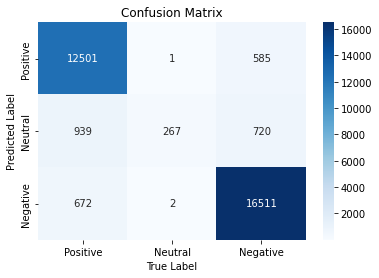

In [129]:
mnb_pred = model_mnb.predict(tv.transform(train.data))

print("Confusion Matrix:\n", confusion_matrix(train.labels, mnb_pred))
print("F1 score:", f1_score(train.labels, mnb_pred, average='micro'))
plot_confusion_matrix(train.labels, mnb_pred)

Confusion Matrix:
 [[5198    7  633]
 [ 632    6  487]
 [ 688    1 6148]]
F1 score: 0.8226086956521739


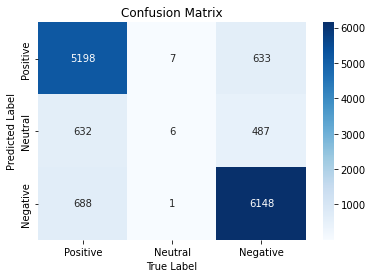

In [130]:
mnb_pred = model_mnb.predict(tv.transform(test.data))

print("Confusion Matrix:\n", confusion_matrix(test.labels, mnb_pred))
print("F1 score:", f1_score(test.labels, mnb_pred, average='micro'))
plot_confusion_matrix(test.labels,mnb_pred )

In [144]:
def model_performance(train_x, train_y, test_x, test_y):
  # tfidf confusion matrix
  tv = TfidfVectorizer(ngram_range=(1,3), stop_words='english', min_df = 2, max_df = 0.65) 
  tv.fit(train_x)
  tv.fit(test_x)
  
  model_mnb = MultinomialNB(alpha=0.24)
  model_mnb.fit(tv.transform(train_x), train_y)
  train_pre = model_mnb.predict(tv.transform(train_x))
  test_pre = model_mnb.predict(tv.transform(test_x))
  print('training') 
  print('train accuracy: ',accuracy_score(train_pre, train_y))
  print('train precision_score: ',precision_score(train_pre, train_y, average='micro')) 
  print('train recall score: ',recall_score(train_pre, train_y, average='micro')) 
    
  print('\n testing')
  print(classification_report(test_pre, test_y))   #uncomment if you want to see full report 
  print('test average accuracy: ',accuracy_score(test_pre, test_y))
  print('test average precision_score: ',precision_score(test_pre, test_y, average='micro')) 
  print('test average recall score: ',recall_score(test_pre, test_y,average='micro')) 


In [145]:
model_performance(train.data, train.labels, test.data, test.labels)

training
train accuracy:  0.8870116156282999
train precision_score:  0.8870116156282999
train recall score:  0.8870116156282999

 testing
              precision    recall  f1-score   support

    negative       0.87      0.80      0.83      6317
     neutral       0.07      0.33      0.12       252
    positive       0.90      0.85      0.87      7231

    accuracy                           0.82     13800
   macro avg       0.61      0.66      0.61     13800
weighted avg       0.87      0.82      0.84     13800

test average accuracy:  0.8186231884057971
test average precision_score:  0.8186231884057971
test average recall score:  0.8186231884057971


In [ ]:
#cv confusion matrix

In [146]:
cv = CountVectorizer(ngram_range=(1,3), stop_words='english', min_df = 1, max_df = 0.3)
cv.fit(train.data)

model_mnb = MultinomialNB(alpha=0.3)
model_mnb.fit(cv.transform(train.data), train.labels)

MultinomialNB(alpha=0.3)

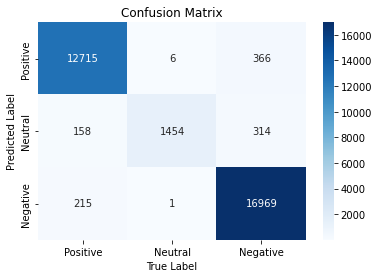

In [153]:
mnb_pred = model_mnb.predict(cv.transform(train.data))
print("Confusion Matrix:\n", confusion_matrix(train.labels, mnb_pred))
print("F1 score:", f1_score(train.labels, mnb_pred, average='micro'))
plot_confusion_matrix(train.labels, mnb_pred)

Confusion Matrix:
 [[5183   16  639]
 [ 646    6  473]
 [ 720    4 6113]]
F1 score: 0.8189855072463769


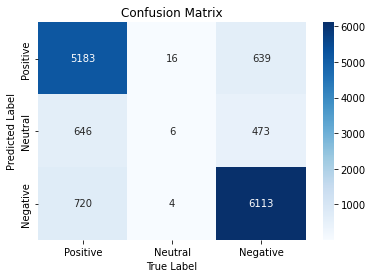

In [178]:
mnb_pred = model_mnb.predict(cv.transform(test.data))

print("Confusion Matrix:\n", confusion_matrix(test.labels, mnb_pred))
print("F1 score:", f1_score(test.labels, mnb_pred, average='micro'))
plot_confusion_matrix(test.labels,mnb_pred )

In [181]:
def model_performance(train_x, train_y, test_x, test_y):
  # cv confusion matrix
  cv = CountVectorizer(ngram_range=(1,3), stop_words='english', min_df = 4, max_df = 0.5) 
  cv.fit(train_x)
  cv.fit(test_x)
  
  model_mnb = MultinomialNB(alpha=0.005)
  model_mnb.fit(cv.transform(train_x), train_y)
  train_pre = model_mnb.predict(cv.transform(train_x))
  test_pre = model_mnb.predict(cv.transform(test_x))
  print('training') 
  print('train accuracy: ',accuracy_score(train_pre, train_y))
  print('train precision_score: ',precision_score(train_pre, train_y, average='micro')) 
  print('train recall score: ',recall_score(train_pre, train_y, average='micro')) 
    
  print('\n testing')
  print(classification_report(test_pre, test_y))   #uncomment if you want to see full report 
  print('test average accuracy: ',accuracy_score(test_pre, test_y))
  print('test average precision_score: ',precision_score(test_pre, test_y, average='micro')) 
  print('test average recall score: ',recall_score(test_pre, test_y,average='micro')) 

In [182]:
model_performance(train.data, train.labels, test.data, test.labels)

training
train accuracy:  0.8767314740045966
train precision_score:  0.8767314740045966
train recall score:  0.8767314740045966

 testing
              precision    recall  f1-score   support

    negative       0.81      0.81      0.81      5891
     neutral       0.20      0.26      0.22       858
    positive       0.88      0.85      0.86      7051

    accuracy                           0.79     13800
   macro avg       0.63      0.64      0.63     13800
weighted avg       0.81      0.79      0.80     13800

test average accuracy:  0.7946376811594202
test average precision_score:  0.7946376811594202
test average recall score:  0.7946376811594202


### Logistic regression

unigram => (0.895521460960308, 0.83)
bigram => (0.9174482887135846, 0.7683333333333333)
trigram => (0.9136902913224424, 0.635)
combined => (0.9225417727809181, 0.8304347826086956)


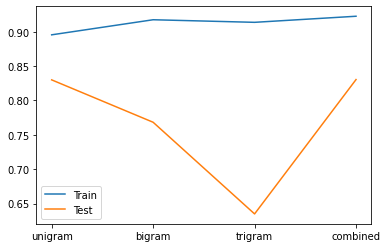

In [166]:
tfidf_vectorizer_names = ['unigram', 'bigram', 'trigram', 'combined']
x_var = list(range(len(tfidf_vectorizer_names)))
outcomes = []
for i in range(len(tfidf_vectorizers)):
  model = LogisticRegression(solver='newton-cg')
  res = classification_model(tfidf_vectorizers[i], model)
  outcomes.append(res)
  print(tfidf_vectorizer_names[i], '=>', res)
  
plt.plot(x_var, outcomes)
plt.xticks(x_var, tfidf_vectorizer_names)
plt.legend(["Train", "Test"])
plt.show()

unigram => (0.9181005031368408, 0.8144202898550724)
bigram => (0.9615814646872477, 0.753768115942029)
trigram => (0.943039940368967, 0.5952173913043478)
combined => (0.9831355984843779, 0.8292028985507246)


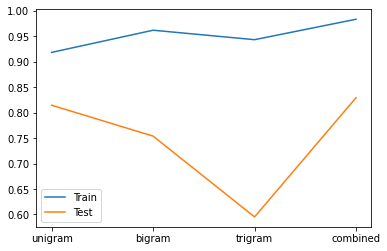

In [204]:
# choose the best countvectorizer n-gram
vectorizer_names = ['unigram', 'bigram', 'trigram', 'combined']
x_var = list(range(len(vectorizer_names)))
outcomes = []
for i in range(len(vectorizers)):
  model = LogisticRegression(solver='newton-cg')
  res = classification_model(vectorizers[i], model)
  outcomes.append(res)
  print(vectorizer_names[i], '=>', res)
  
plt.plot(x_var, outcomes)
plt.xticks(x_var, vectorizer_names)
plt.legend(["Train", "Test"])
plt.show()

In [195]:
# Logistic Regression - tfidf
min_df_range = np.arange(1,11,3)
max_df_range = np.arange(0.6,0.9,0.1)
max_test_accuracy=0
for j in min_df_range:
  for n in max_df_range:
    model = LogisticRegression(solver='newton-cg')
    comb = TfidfVectorizer(ngram_range=(1,3),min_df = j, max_df = n)
    comb.fit(train.data)
    res = classification_model(comb, model)
    #outcomes.append(res)
    print("min_df",j,",","max_df",n, '=>', res)
    if(res[1] > max_test_accuracy):
      opt_min_df = j
      opt_max_df = n
      max_test_accuracy = res[1]
print("Choice:", "Min_df",opt_min_df,",", "Max_df", opt_max_df, "accuracy", max_test_accuracy)

min_df 1 , max_df 0.6 => (0.9225417727809181, 0.8304347826086956)
min_df 1 , max_df 0.7 => (0.9225417727809181, 0.8304347826086956)
min_df 1 , max_df 0.7999999999999999 => (0.9225417727809181, 0.8304347826086956)
min_df 1 , max_df 0.8999999999999999 => (0.9225417727809181, 0.8304347826086956)
min_df 4 , max_df 0.6 => (0.9059568917324058, 0.8331884057971014)
min_df 4 , max_df 0.7 => (0.9059568917324058, 0.8331884057971014)
min_df 4 , max_df 0.7999999999999999 => (0.9059568917324058, 0.8331884057971014)
min_df 4 , max_df 0.8999999999999999 => (0.9059568917324058, 0.8331884057971014)
min_df 7 , max_df 0.6 => (0.9008012920057146, 0.8330434782608696)
min_df 7 , max_df 0.7 => (0.9008012920057146, 0.8330434782608696)
min_df 7 , max_df 0.7999999999999999 => (0.9008012920057146, 0.8330434782608696)
min_df 7 , max_df 0.8999999999999999 => (0.9008012920057146, 0.8330434782608696)
min_df 10 , max_df 0.6 => (0.8969811789552146, 0.8335507246376812)
min_df 10 , max_df 0.7 => (0.8969811789552146, 0.83

In [192]:
# Logistic Regression - CountVect
min_df_range = np.arange(1,11,3)
max_df_range = np.arange(0.6,0.9,0.1)
max_test_accuracy=0
for j in min_df_range:
  for n in max_df_range:
    model = LogisticRegression(solver='newton-cg')
    comb = CountVectorizer(ngram_range=(1,3),min_df = j, max_df = n)
    comb.fit(train.data)
    res = classification_model(comb, model)
    #outcomes.append(res)
    print("min_df",j,",","max_df",n, '=>', res)
    if(res[1] > max_test_accuracy):
      opt_min_df = j
      opt_max_df = n
      max_test_accuracy = res[1]
print("Choice:", "Min_df",opt_min_df,",", "Max_df", opt_max_df, "accuracy", max_test_accuracy)

min_df 1 , max_df 0.6 => (0.9831355984843779, 0.8292028985507246)
min_df 1 , max_df 0.7 => (0.9831355984843779, 0.8292028985507246)
min_df 1 , max_df 0.7999999999999999 => (0.9831355984843779, 0.8292028985507246)
min_df 1 , max_df 0.8999999999999999 => (0.9831355984843779, 0.8292028985507246)
min_df 4 , max_df 0.6 => (0.9559599975153736, 0.8194202898550724)
min_df 4 , max_df 0.7 => (0.9559599975153736, 0.8194202898550724)
min_df 4 , max_df 0.7999999999999999 => (0.9559599975153736, 0.8194202898550724)
min_df 4 , max_df 0.8999999999999999 => (0.9559599975153736, 0.8194202898550724)
min_df 7 , max_df 0.6 => (0.9404621405056215, 0.817536231884058)
min_df 7 , max_df 0.7 => (0.9404621405056215, 0.817536231884058)
min_df 7 , max_df 0.7999999999999999 => (0.9404621405056215, 0.817536231884058)
min_df 7 , max_df 0.8999999999999999 => (0.9404621405056215, 0.817536231884058)
min_df 10 , max_df 0.6 => (0.9285048760792597, 0.8143478260869565)
min_df 10 , max_df 0.7 => (0.9285048760792597, 0.814347

In [ ]:
# tfidf confusion matrix

In [199]:
tv = TfidfVectorizer(ngram_range=(1,3),min_df = 10, max_df = 0.6)
tv.fit(train.data)

model = LogisticRegression(solver='newton-cg')
model.fit(tv.transform(train.data), train.labels)

LogisticRegression(solver='newton-cg')

Confusion Matrix:
 [[12355    33   699]
 [  953   201   772]
 [  805    55 16325]]
F1 score: 0.8969811789552146


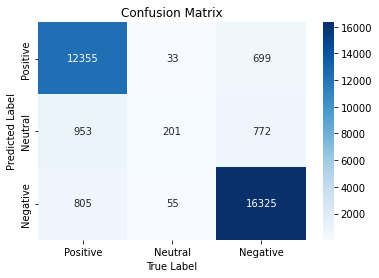

In [200]:
model_pred = model.predict(tv.transform(train.data))
print("Confusion Matrix:\n", confusion_matrix(train.labels, model_pred))
print("F1 score:", f1_score(train.labels, model_pred, average='micro'))
plot_confusion_matrix(train.labels, model_pred)

Confusion Matrix:
 [[5151   51  636]
 [ 583   58  484]
 [ 506   37 6294]]
F1 score: 0.8335507246376812


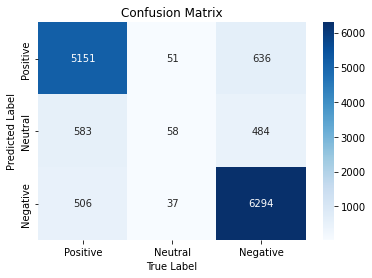

In [201]:
model_pred = model.predict(tv.transform(test.data))

print("Confusion Matrix:\n", confusion_matrix(test.labels, model_pred))
print("F1 score:", f1_score(test.labels, model_pred, average='micro'))
plot_confusion_matrix(test.labels,model_pred )

In [202]:
# tfidf model performance 
def model_performance(train_x, train_y, test_x, test_y):
  # tfidf confusion matrix
  tv = TfidfVectorizer(ngram_range=(1,3),min_df = 10, max_df = 0.6)
  tv.fit(train_x)
  tv.fit(test_x)
  
  model = LogisticRegression(solver='newton-cg')
  model.fit(tv.transform(train_x), train_y)
  train_pre = model.predict(tv.transform(train_x))
  test_pre = model.predict(tv.transform(test_x))
  print('training') 
  print('train accuracy: ',accuracy_score(train_pre, train_y))
  print('train precision_score: ',precision_score(train_pre, train_y, average='micro')) 
  print('train recall score: ',recall_score(train_pre, train_y, average='micro')) 
    
  print('\n testing')
  print(classification_report(test_pre, test_y))   #uncomment if you want to see full report 
  print('test average accuracy: ',accuracy_score(test_pre, test_y))
  print('test average precision_score: ',precision_score(test_pre, test_y, average='micro')) 
  print('test average recall score: ',recall_score(test_pre, test_y,average='micro'))

In [203]:
model_performance(train.data, train.labels, test.data, test.labels)

training
train accuracy:  0.8870116156282999
train precision_score:  0.8870116156282999
train recall score:  0.8870116156282999

 testing
              precision    recall  f1-score   support

    negative       0.87      0.83      0.85      6172
     neutral       0.05      0.38      0.09       149
    positive       0.92      0.84      0.88      7479

    accuracy                           0.83     13800
   macro avg       0.62      0.68      0.61     13800
weighted avg       0.89      0.83      0.86     13800

test average accuracy:  0.8300724637681159
test average precision_score:  0.8300724637681159
test average recall score:  0.8300724637681159


In [ ]:
#cv confusion matrix

In [196]:
cv = CountVectorizer(ngram_range=(1,3), stop_words='english', min_df = 1, max_df = 0.6) 
cv.fit(train.data)

model = LogisticRegression(solver='newton-cg')
model.fit(cv.transform(train.data), train.labels)

LogisticRegression(solver='newton-cg')

Confusion Matrix:
 [[12784     5   298]
 [   88  1614   224]
 [   54     2 17129]]
F1 score: 0.9791601962854836


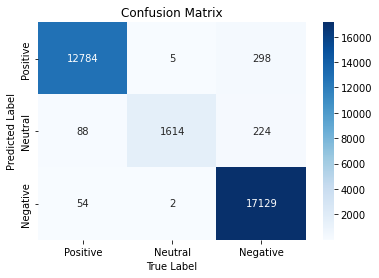

In [197]:
model_pred = model.predict(cv.transform(train.data))
print("Confusion Matrix:\n", confusion_matrix(train.labels, model_pred))
print("F1 score:", f1_score(train.labels, model_pred, average='micro'))
plot_confusion_matrix(train.labels, model_pred)

Confusion Matrix:
 [[4905  110  823]
 [ 522   89  514]
 [ 434   41 6362]]
F1 score: 0.8228985507246377


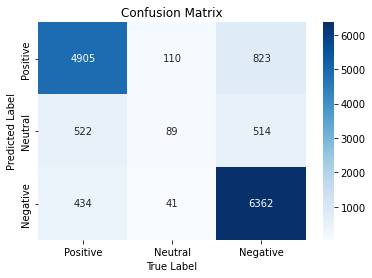

In [198]:
model_pred = model.predict(cv.transform(test.data))

print("Confusion Matrix:\n", confusion_matrix(test.labels, model_pred))
print("F1 score:", f1_score(test.labels, model_pred, average='micro'))
plot_confusion_matrix(test.labels,model_pred )

In [193]:
# cv model performance 
def model_performance(train_x, train_y, test_x, test_y):
  # cv confusion matrix
  cv = CountVectorizer(ngram_range=(1,3), stop_words='english', min_df = 1, max_df = 0.6) 
  cv.fit(train_x)
  cv.fit(test_x)
  
  model = LogisticRegression(solver='newton-cg')
  model.fit(cv.transform(train_x), train_y)
  train_pre = model.predict(cv.transform(train_x))
  test_pre = model.predict(cv.transform(test_x))
  print('training') 
  print('train accuracy: ',accuracy_score(train_pre, train_y))
  print('train precision_score: ',precision_score(train_pre, train_y, average='micro')) 
  print('train recall score: ',recall_score(train_pre, train_y, average='micro')) 
    
  print('\n testing')
  print(classification_report(test_pre, test_y))   #uncomment if you want to see full report 
  print('test average accuracy: ',accuracy_score(test_pre, test_y))
  print('test average precision_score: ',precision_score(test_pre, test_y, average='micro')) 
  print('test average recall score: ',recall_score(test_pre, test_y,average='micro')) 

In [194]:
model_performance(train.data, train.labels, test.data, test.labels)

training
train accuracy:  0.9552767252624387
train precision_score:  0.9552767252624387
train recall score:  0.9552767252624387

 testing
              precision    recall  f1-score   support

    negative       0.82      0.84      0.83      5762
     neutral       0.09      0.29      0.14       353
    positive       0.93      0.82      0.87      7685

    accuracy                           0.82     13800
   macro avg       0.61      0.65      0.61     13800
weighted avg       0.86      0.82      0.84     13800

test average accuracy:  0.8155072463768116
test average precision_score:  0.8155072463768116
test average recall score:  0.8155072463768116


### Random Forest

unigram => (0.9909000559040935, 0.8182608695652174)
bigram => (0.9831666563140568, 0.7392753623188407)
trigram => (0.9661780234797193, 0.6042028985507246)
combined => (0.9912727498602397, 0.8139130434782609)


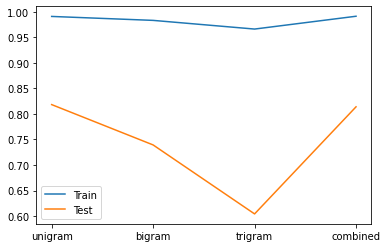

In [205]:
# choose the best countvectorizer n-gram
vectorizer_names = ['unigram', 'bigram', 'trigram', 'combined']
x_var = list(range(len(vectorizer_names)))
outcomes = []
for i in range(len(vectorizers)):
  model = RandomForestClassifier()
  res = classification_model(vectorizers[i], model)
  outcomes.append(res)
  print(vectorizer_names[i], '=>', res)
  
plt.plot(x_var, outcomes)
plt.xticks(x_var, vectorizer_names)
plt.legend(["Train", "Test"])
plt.show()

unigram => (0.9908379402447357, 0.8155797101449276)
bigram => (0.9831666563140568, 0.7439855072463769)
trigram => (0.9662090813093981, 0.6054347826086957)
combined => (0.9912727498602397, 0.817391304347826)


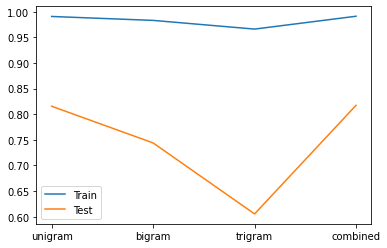

In [206]:
# choose the best tfidf n-gram
tfidf_vectorizer_names = ['unigram', 'bigram', 'trigram', 'combined']
x_var = list(range(len(tfidf_vectorizer_names)))
outcomes = []
for i in range(len(tfidf_vectorizers)):
  model = RandomForestClassifier()
  res = classification_model(tfidf_vectorizers[i], model)
  outcomes.append(res)
  print(tfidf_vectorizer_names[i], '=>', res)
  
plt.plot(x_var, outcomes)
plt.xticks(x_var, tfidf_vectorizer_names)
plt.legend(["Train", "Test"])
plt.show()

In [ ]:
random forest classifer: n-estimater, min_sample_split

In [208]:
# random forest - Tfidf
n_estimators = np.arange(160,230,30)
max_test_accuracy=0
for i in n_estimators:
  model = RandomForestClassifier(n_estimators = i)
  tfidf_comb = TfidfVectorizer(ngram_range=(1,3),min_df = 5, max_df = 0.8)
  tfidf_comb.fit(train.data)
  res = classification_model(tfidf_comb, model)
  #outcomes.append(res)
  print("n_estimators",i, '=>', res)
  if(res[1] > max_test_accuracy):
    opt_n_estimators = i
    max_test_accuracy = res[1]
print("Choice:", "n_estimators", opt_n_estimators,"accuracy", max_test_accuracy)

n_estimators 160 => (0.9878874464252438, 0.8169565217391305)
n_estimators 190 => (0.9878874464252438, 0.8145652173913044)
n_estimators 220 => (0.9878874464252438, 0.8160869565217391)
Choice: n_estimators 160 accuracy 0.8169565217391305


In [207]:
# random forest - countvectizor
n_estimators = np.arange(130,230,30)
max_test_accuracy=0
for i in n_estimators:
  model = RandomForestClassifier(n_estimators = i)
  comb = CountVectorizer(ngram_range=(1,1),min_df = 5, max_df = 0.7)
  comb.fit(train.data)
  res = classification_model(comb, model)
  #outcomes.append(res)
  print("n_estimators",i, '=>', res)
  if(res[1] > max_test_accuracy):
    opt_n_estimators = i
    max_test_accuracy = res[1]
print("Choice:", "n_estimators", opt_n_estimators,"accuracy", max_test_accuracy)

n_estimators 130 => (0.9875147524690975, 0.8157246376811594)
n_estimators 160 => (0.9875147524690975, 0.8157971014492753)
n_estimators 190 => (0.9875147524690975, 0.8160144927536231)
n_estimators 220 => (0.9875147524690975, 0.8169565217391305)
Choice: n_estimators 220 accuracy 0.8169565217391305


In [ ]:
# tfidf confusion matrix

In [211]:
tv = TfidfVectorizer(ngram_range=(1,3),min_df = 5, max_df = 0.8)
tv.fit(train.data)

model = RandomForestClassifier(n_estimators = 160)
model.fit(tv.transform(train.data), train.labels)

RandomForestClassifier(n_estimators=160)

Confusion Matrix:
 [[12918     6   163]
 [   54  1754   118]
 [   46     3 17136]]
F1 score: 0.9878874464252438


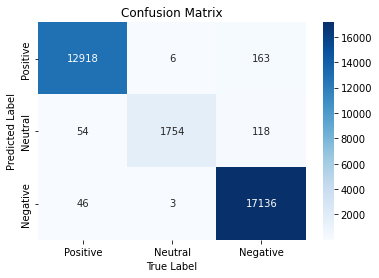

In [212]:
model_pred = model.predict(tv.transform(train.data))
print("Confusion Matrix:\n", confusion_matrix(train.labels, model_pred))
print("F1 score:", f1_score(train.labels, model_pred, average='micro'))
plot_confusion_matrix(train.labels, model_pred)

Confusion Matrix:
 [[5112   39  687]
 [ 670   16  439]
 [ 705   15 6117]]
F1 score: 0.8148550724637681


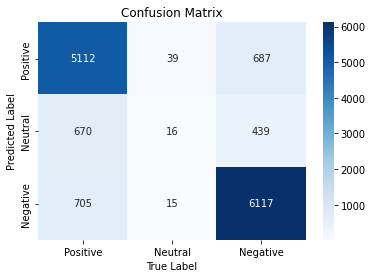

In [213]:
model_pred = model.predict(tv.transform(test.data))

print("Confusion Matrix:\n", confusion_matrix(test.labels, model_pred))
print("F1 score:", f1_score(test.labels, model_pred, average='micro'))
plot_confusion_matrix(test.labels,model_pred )

In [214]:
# tfidf model performance 
def model_performance(train_x, train_y, test_x, test_y):
  # tfidf confusion matrix
  tv = TfidfVectorizer(ngram_range=(1,3),min_df = 5, max_df = 0.8)
  tv.fit(train_x)
  tv.fit(test_x)
  
  model = RandomForestClassifier(n_estimators = 160)
  model.fit(tv.transform(train_x), train_y)
  train_pre = model.predict(tv.transform(train_x))
  test_pre = model.predict(tv.transform(test_x))
  print('training') 
  print('train accuracy: ',accuracy_score(train_pre, train_y))
  print('train precision_score: ',precision_score(train_pre, train_y, average='micro')) 
  print('train recall score: ',recall_score(train_pre, train_y, average='micro')) 
    
  print('\n testing')
  print(classification_report(test_pre, test_y))   #uncomment if you want to see full report 
  print('test average accuracy: ',accuracy_score(test_pre, test_y))
  print('test average precision_score: ',precision_score(test_pre, test_y, average='micro')) 
  print('test average recall score: ',recall_score(test_pre, test_y,average='micro'))

In [215]:
model_performance(train.data, train.labels, test.data, test.labels)

training
train accuracy:  0.9852164730728616
train precision_score:  0.9852164730728616
train recall score:  0.9852164730728616

 testing
              precision    recall  f1-score   support

    negative       0.88      0.78      0.83      6587
     neutral       0.02      0.22      0.03        82
    positive       0.89      0.85      0.87      7131

    accuracy                           0.81     13800
   macro avg       0.59      0.62      0.58     13800
weighted avg       0.88      0.81      0.84     13800

test average accuracy:  0.8133333333333334
test average precision_score:  0.8133333333333334
test average recall score:  0.8133333333333334


In [ ]:
#cv confusion matrix

In [217]:
cv = CountVectorizer(ngram_range=(1,1), stop_words='english', min_df = 5, max_df = 0.7) 
cv.fit(train.data)

model = RandomForestClassifier(n_estimators = 220)
model.fit(cv.transform(train.data), train.labels)

RandomForestClassifier(n_estimators=220)

Confusion Matrix:
 [[12870    17   200]
 [   64  1743   119]
 [   63    20 17102]]
F1 score: 0.9849990682651096


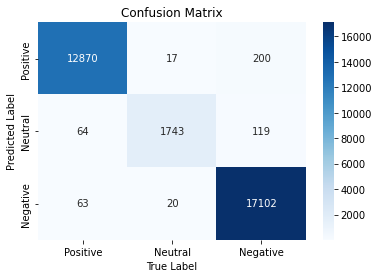

In [218]:
model_pred = model.predict(cv.transform(train.data))
print("Confusion Matrix:\n", confusion_matrix(train.labels, model_pred))
print("F1 score:", f1_score(train.labels, model_pred, average='micro'))
plot_confusion_matrix(train.labels, model_pred)

Confusion Matrix:
 [[5041   83  714]
 [ 659   48  418]
 [ 684   45 6108]]
F1 score: 0.8113768115942029


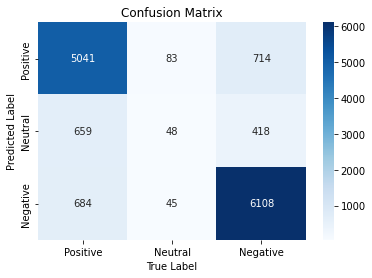

In [219]:
model_pred = model.predict(cv.transform(test.data))

print("Confusion Matrix:\n", confusion_matrix(test.labels, model_pred))
print("F1 score:", f1_score(test.labels, model_pred, average='micro'))
plot_confusion_matrix(test.labels,model_pred )

In [220]:
# cv model performance 
def model_performance(train_x, train_y, test_x, test_y):
  # cv confusion matrix
  cv = CountVectorizer(ngram_range=(1,1), stop_words='english', min_df = 5, max_df = 0.7) 
  cv.fit(train_x)
  cv.fit(test_x)
  
  model = RandomForestClassifier(n_estimators = 220)
  model.fit(cv.transform(train_x), train_y)
  train_pre = model.predict(cv.transform(train_x))
  test_pre = model.predict(cv.transform(test_x))
  print('training') 
  print('train accuracy: ',accuracy_score(train_pre, train_y))
  print('train precision_score: ',precision_score(train_pre, train_y, average='micro')) 
  print('train recall score: ',recall_score(train_pre, train_y, average='micro')) 
    
  print('\n testing')
  print(classification_report(test_pre, test_y))   #uncomment if you want to see full report 
  print('test average accuracy: ',accuracy_score(test_pre, test_y))
  print('test average precision_score: ',precision_score(test_pre, test_y, average='micro')) 
  print('test average recall score: ',recall_score(test_pre, test_y,average='micro')) 

In [221]:
model_performance(train.data, train.labels, test.data, test.labels)

training
train accuracy:  0.9816448226597926
train precision_score:  0.9816448226597926
train recall score:  0.9816448226597926

 testing
              precision    recall  f1-score   support

    negative       0.86      0.79      0.82      6353
     neutral       0.04      0.27      0.08       186
    positive       0.89      0.84      0.87      7261

    accuracy                           0.81     13800
   macro avg       0.60      0.63      0.59     13800
weighted avg       0.87      0.81      0.84     13800

test average accuracy:  0.8097826086956522
test average precision_score:  0.8097826086956522
test average recall score:  0.8097826086956522
